<a href="https://colab.research.google.com/github/manikanta741/datamining/blob/main/dlextexp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.2084 - loss: 3.5035 - val_accuracy: 0.5748 - val_loss: 2.2063
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5130 - loss: 2.2737 - val_accuracy: 0.6518 - val_loss: 1.6544
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6016 - loss: 1.7711 - val_accuracy: 0.6723 - val_loss: 1.4725
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6388 - loss: 1.5573 - val_accuracy: 0.6915 - val_loss: 1.3714
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6603 - loss: 1.4512 - val_accuracy: 0.6981 - val_loss: 1.2985
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6950 - loss: 1.2947 - val_accuracy: 0.7128 - val_loss: 1.2508
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7108 - loss: 1.2227 - val_accuracy: 0.7146 - val_loss: 1.2031
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7229 - loss: 1.1426 - val_accuracy: 0.7306 - 

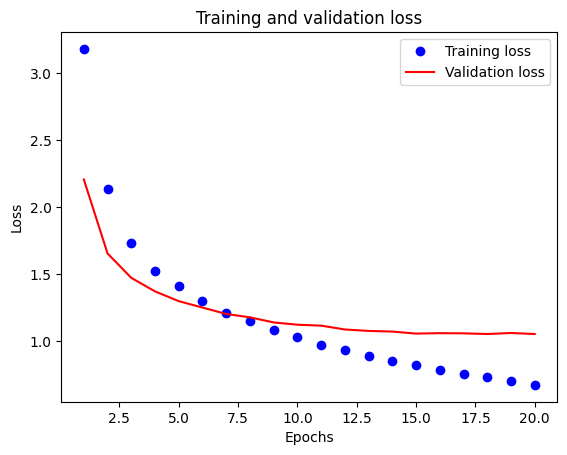

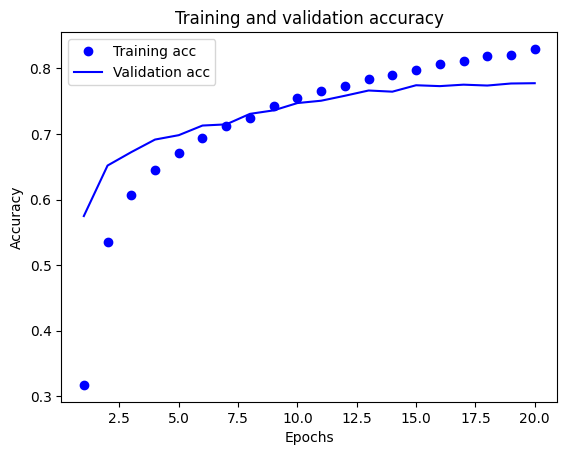

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
 [[ 6  3  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 [ 0  3 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.61      0.86      0.71       105
           2       0.69      0.55      0.61        20
           3       0.91      0.94      0.93       813
           4       0.84      0.90      0.87       474
           5       0.00      0.00      0.00         5
           6       0.80      0.57      0.67        14
           7       0.00      0.00      0.00         3
           8       0.70      0.68      0.69        38
           9       0.78      0.72      0.75        25
          10       0.84      0.87      0.85        30
          11       0.57      0.83      0.67        83
          12       0.50      0.23      0.32        13
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)
